# ASSIGNMENT - 1 

## Submitted By:
    Name: Aishwarya Wagdarkar
    NUID: 002964461

## Information:
    Online Retail dataset contains information related to the following 8 variables -
    InvoiceNo
    StockCode
    Description
    Quantity
    InvoiceDate
    UnitPrice
    CustomerID
    Country

# I. Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.cm as cm
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\aishw\\OneDrive\\Desktop\\ADS\\Assignment1'

## Importing and Displaying Dataset

In [3]:
'''To find out more about this online retail data, please visit 
https://archive.ics.uci.edu/ml/datasets/Online+Retail'''

# df =pd.read_excel("C:/Users/aishw/OneDrive/Desktop/ADS/Assignment1/Online Retail.xlsx")
df =pd.read_excel(r"C:/Users/aishw/OneDrive/Desktop\ADS\Assignment1\Online Retail.xlsx")
print(df.shape)
df.head(3)

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


<AxesSubplot:xlabel='Percent missing', ylabel='Feature'>

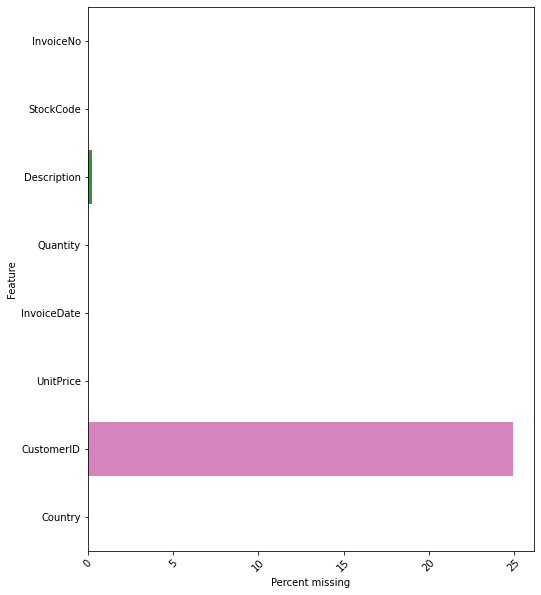

In [5]:
'''Calculate percentage null values for each column or feature'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,10))
plt.xticks(rotation=45)
sns.barplot(x = "Percent missing",y ="Feature",data = null_vals,orient = "h")

In [6]:
'''Drop rows with any null values'''

df1 = df.dropna(subset = ["CustomerID","Description"])
df1.shape

(406829, 8)

In [7]:
'''Drop duplicated rows'''

df2 = df1.drop_duplicates()
print(df2.shape)
df2.head(2)

(401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
'''Select columns you need'''

df3 = df2 [['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]
print(df3.shape)
df3.head(2)

(401604, 5)


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [9]:
'''Create a total price column by multiplying quantity with unit price'''

df3['TotalPrice'] = df3['Quantity'] * df3['UnitPrice']
print(df3.shape)
df3.head(2)

(401604, 6)


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [10]:
'''Print out earliest and latest dates in the data'''

print('Min:{}; Max:{}'.format(df3["InvoiceDate"].min(), df3["InvoiceDate"].max()))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [11]:
'''Create a reference point for the analysis'''

current_date = dt.datetime(2011,12,10)
current_date

datetime.datetime(2011, 12, 10, 0, 0)

In [12]:
'''Calculate the aggregates" recency, frequency and, monetary. 
Recency tells you how many days since last transaction for each customer, 
frequency tells you how frequently does a customer shop and,
monetary tells you the total shopping spending for each customer'''

df4 = df3.groupby(['CustomerID']).agg({ 'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': 'count',
'TotalPrice': 'sum'})
df4.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','TotalPrice': 'Monetary'}, inplace=True)
print(df4.shape)
df4.head(3)

(4372, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24


In [13]:
'''Remove rows with any zero values. This is to facilitate downstream pre-processing and avoid NaNs'''

df5 = df4[(df4 > 0).all(1)]
print(df5.shape)

(4284, 3)


# II. Data Pre-processing

In [14]:
'''The K-means clustering algorithm has a few key assumptions about the data: (1) data is not skewed, 
(2) features have the same mean and, (3) features have the same variance'''

df5.describe()

,Recency,Frequency,Monetary
count,4284.000000,4284.000000,4.284000e+03
mean,90.673436,90.187675,1.802891e+03
std,99.212825,217.749044,7.226246e+03
min,1.000000,1.000000,1.776357e-15
25%,17.000000,18.000000,2.988725e+02
50%,50.000000,42.000000,6.467200e+02
75%,140.000000,99.000000,1.596963e+03
max,373.000000,7812.000000,2.794890e+05


Looks like the means and standard deviations are so different. So, we need to transform the data to meet
the requirements

<AxesSubplot:xlabel='Recency', ylabel='Density'>

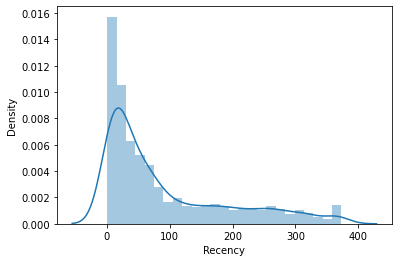

In [15]:
'''Are the data dimensions skewed?'''

sns.distplot(df5['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

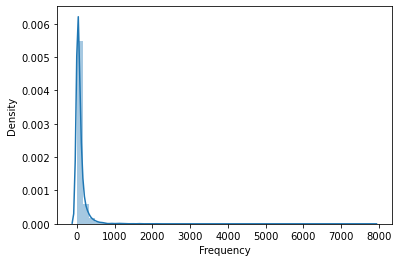

In [16]:
sns.distplot(df5['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

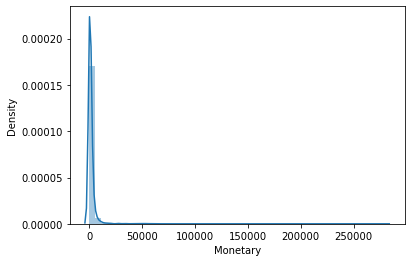

In [17]:
sns.distplot(df5['Monetary'])

In [18]:
'''Looks like the data is skewed. Maybe monetary is not, but the other two definitely are skewed. We log
transform the data to remove the skew. Add a constant to offset any negative values. '''

df6 = (np.log(df5 + 1))
print(df6.shape)
df6.head(3)


(4284, 3)


,Recency,Frequency,Monetary
CustomerID,,,
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.944439,4.304065,7.472245


<AxesSubplot:xlabel='Recency', ylabel='Density'>

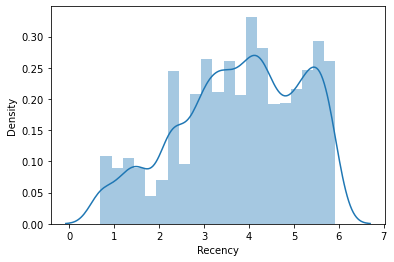

In [19]:
'''Has log transfors made any difference?'''

sns.distplot(df6['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

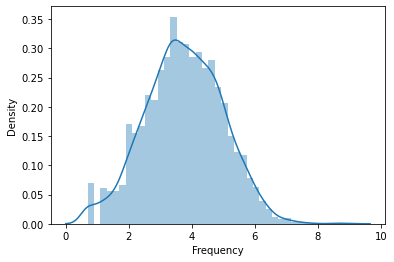

In [20]:
'''Has log transfors made any difference?'''

sns.distplot(df6['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

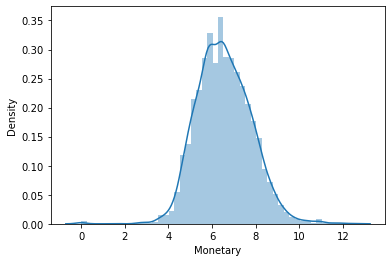

In [21]:
'''Has log transfors made any difference?'''

sns.distplot(df6['Monetary'])

It has made the data look more normal !

# III. K-means clustering

In [22]:

X = df6.values


In [23]:
X[:,0]

array([1.09861229, 4.33073334, 2.94443898, ..., 2.07944154, 1.38629436,
       3.76120012])

In [24]:
X[:,1]

array([5.20948615, 3.4657359 , 4.30406509, ..., 2.63905733, 6.58202514,
       4.26267988])

In [25]:
def sum_of_sqrt_err(X, centroids, cluster):
    err_sum = 0
    for i, value in enumerate(X):
        err_sum += np.sqrt((centroids[int(cluster[i]), 0]-value[0])**2 + (centroids[int(cluster[i]), 1]-value[1])**2)
    return err_sum

In [26]:
def kmeans(X, k):
    diff = 10
    cluster = np.zeros(X.shape[0])
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroid_coll = X[random_indices, :]
    while diff:
        for i, row in enumerate(X):
            mn_dist = float('inf')
            for idx, centroid in enumerate(centroid_coll):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroid_coll = pd.DataFrame(X).groupby(by=cluster).mean().values
        if np.count_nonzero(centroid_coll-new_centroid_coll) == 0:
            diff = diff - 1
        else:
            centroid_coll = new_centroid_coll
    return centroid_coll, cluster  

In [27]:
err_sums = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    err = sum_of_sqrt_err(X, centroids, cluster)
    err_sums.append(err)

In [28]:
max(X[:,1])

8.963544291996744

### Plot with Clusters

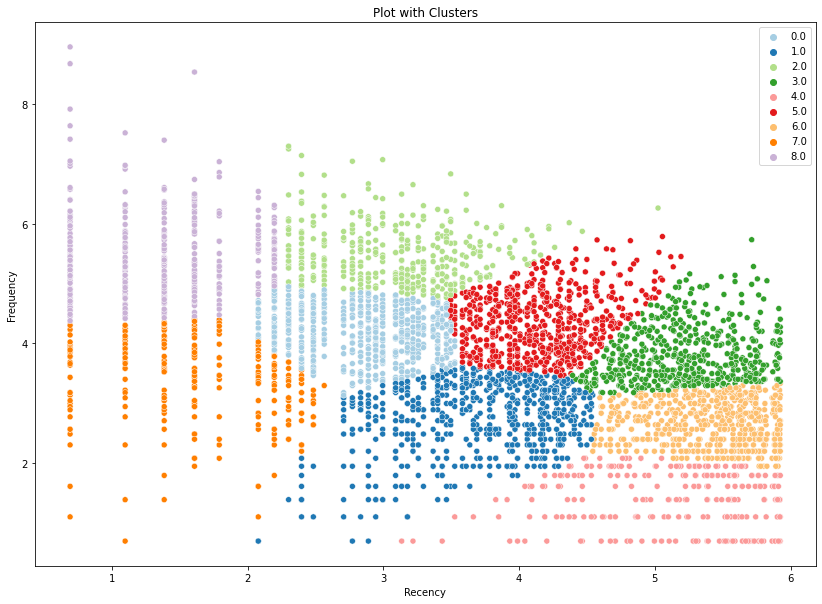

In [29]:
plt.figure(figsize = (14,10))
sns.scatterplot(X[:,0], X[:, 1], hue=cluster, palette="Paired")
plt.title('Plot with Clusters')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()